**Importing all necessary libraries.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Loading the dataset of Calfornia housing from sklearn.datasets**

In [ ]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

**Checking type of dataset**

In [ ]:
type(housing)

sklearn.utils._bunch.Bunch

**Decription of data :** this provides essential information about the dataset's characteristics, including the number of instances, attributes, and a list of the numeric, predictive attributes along with their meanings.

In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

**Extarcting features**

In [ ]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


**Extracting Target**

In [ ]:
print(housing.target_names)

['MedHouseVal']


# Data Prepartion
We need to prepare a dataframe fron this data for further Exploratory Data Analysis to further train model



In [ ]:
df= pd.DataFrame(data = housing.data ,columns= housing.feature_names)

In [ ]:
df.sample(7)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1608,3.6437,17.0,5.158730,1.073844,2092.0,1.443754,37.85,-122.06
6162,4.0640,34.0,4.852217,1.172414,1269.0,3.125616,34.08,-117.94
18719,1.7227,14.0,4.452425,1.056903,2101.0,1.959888,40.61,-122.38
7679,4.1449,37.0,5.769231,1.053254,1183.0,3.500000,33.93,-118.09
10818,4.1029,19.0,4.032995,1.068528,1118.0,2.837563,33.65,-117.91
19127,4.0729,32.0,6.470874,1.140777,660.0,3.203883,38.25,-122.67
6669,5.4223,52.0,7.112613,1.033784,1229.0,2.768018,34.16,-118.11


**Adding the target column into the dataframe i.e. Price .**

In [ ]:
df['Price']=housing.target

In [ ]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
9125,4.0147,34.0,6.024691,1.059965,1929.0,3.402116,34.58,-118.07,1.074
14509,4.1429,12.0,5.308550,1.126394,528.0,1.962825,32.87,-117.21,2.544
14380,2.6962,36.0,4.096998,1.103926,1648.0,1.903002,32.74,-117.25,2.882
17232,2.8750,43.0,4.779468,1.182510,671.0,2.551331,34.43,-119.69,2.806
11967,2.0742,31.0,4.212014,1.084806,1013.0,3.579505,34.00,-117.40,0.762


**Information and Stastical terms of the Data.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# EDA
To find the Correation coefficients in the features and main reason to proceed this is so that similar behavioured features could be chosen selectively to reduce the complexity oft he model to train and also a good practice.

In [ ]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


**Note:** here we can observe that the highly correleated features are {AveRooms - AveBedrms} and {Longitude -Latitude}.
So, we need to use only out of them only to behave well.


In [ ]:
df = df.drop(['AveRooms', 'Longitude'], axis=1)

In [ ]:
df.sample(3)

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Price
9847,5.5519,35.0,1.009852,1110.0,2.733990,36.60,3.295
11949,3.9118,32.0,1.063529,1479.0,3.480000,33.94,1.141
11738,1.7375,52.0,1.056391,523.0,1.966165,38.90,1.222


**Observing the interreleations using pairplot.**

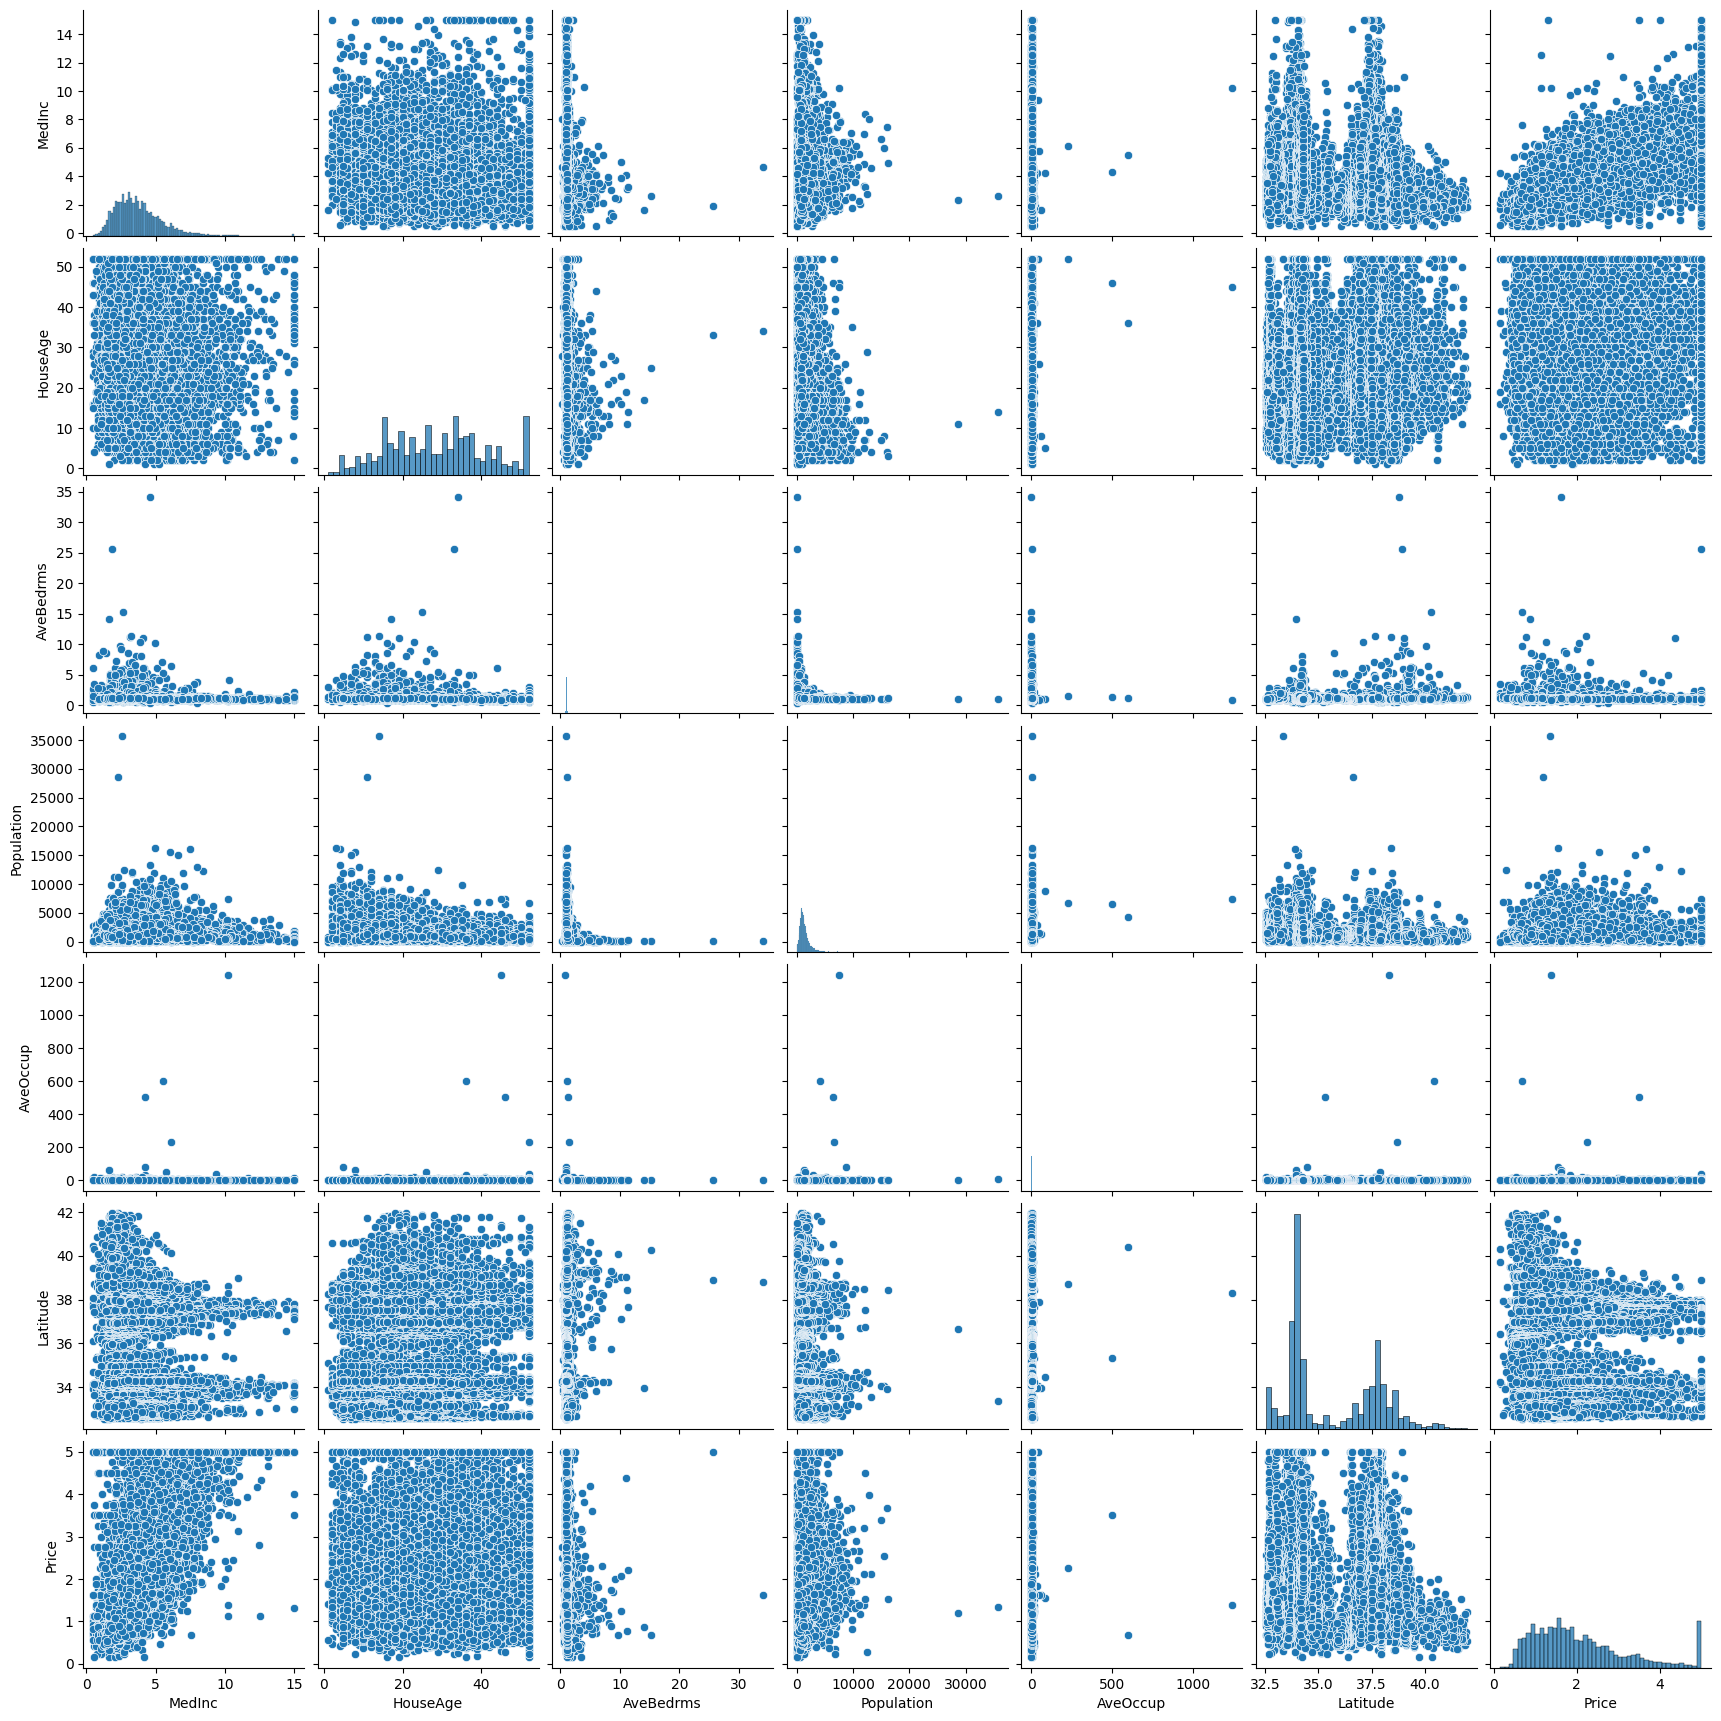

In [ ]:
sns.pairplot(df)

**Detecting Outliers: We need to plot the boxplot to identify ouliers.**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

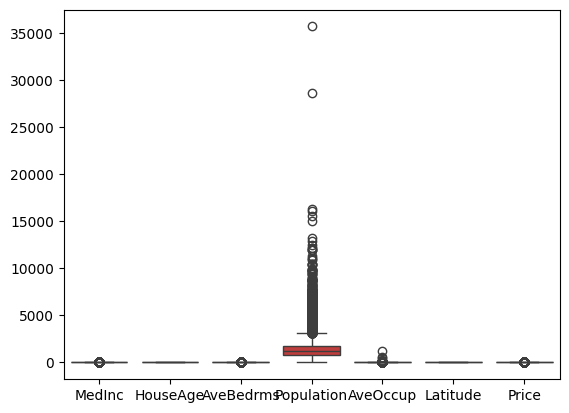

In [ ]:
sns.boxplot(df)
plt.savefig("boxplot.jpg")

**Note:** From here we can observe that the data set is biased over population which will result in poor outputs to trian model as popluation factor will domainate ,so we will scale data (normalise) using min max scaling .
The formula for Min-Max Scaling is as follows:

Xnormalized = Xmax −Xmin /X−Xmin

where:
1.  X is the original value of the feature.
2.  Xmin is the minimum value of the feature.
1.  Xmax is the maximum value of the feature.
2.  Xnormalized is the normalized value.





In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)


**Spilt the data into Train and Test Data.**

In [ ]:
features=df.iloc[ :, :-1]
target=df.iloc[ : ,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_Train , X_Test , Y_Train , Y_Test =train_test_split(features,target , test_size=0.3 , random_state=42)


1.  features: This represents your feature matrix, which includes all the independent variables.
2.   target: This is your target variable or dependent variable.
1.   test_size: This parameter specifies the proportion of the dataset to include in the test split. In this example, it's set to 0.2, meaning 20% of the data will be used for testing, and the remaining 80% for training.
2.  random_state: Setting a random seed ensures reproducibility. The same seed will result in the same split each time you run the code





**Normalizing the Data.**
Centers the data around zero and scales it based on the standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_norm = scaler.fit_transform(X_Train)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

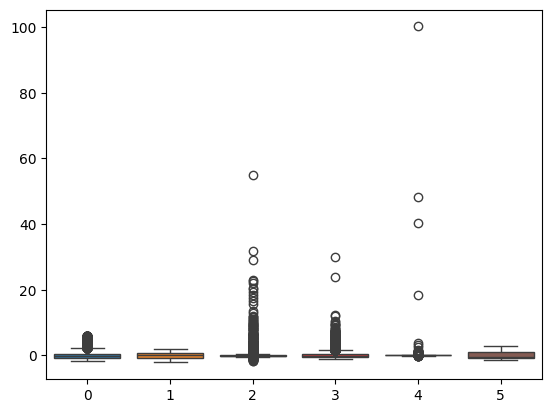

In [ ]:
sns.boxplot(x_train_norm)

In [ ]:
from sklearn.preprocessing import StandardScaler
x_test_norm = scaler.transform(X_Test)


1. scaler.fit_transform(X_train): This fits the scaler to the training data and transforms the training data accordingly.
2. scaler.transform(X_test): This uses the same scaler to transform the test data. The scaler applies the transformation learned from the training data to maintain consistency.
**NOTE:** Consistent scaling between the training and test sets is crucial for the model to make accurate predictions on new, unseen data. It ensures that the scaling characteristics learned from the training set are applied uniformly to the test set.



# Model Training

Import neceassary libraries.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Importing Linear Regression Model.

In [ ]:
# Initialize the Linear Regression model
regression = LinearRegression()


Fitting model to train Dataset.

In [ ]:
# Fit the model to the scaled training data
regression.fit(x_train_norm, Y_Train)


LinearRegression()

In [ ]:
# Retrieve the slope (m) values
slope_values = regression.coef_

# Retrieve the y-intercept (c) value
intercept_value = regression.intercept_


Predicting Using the model.


In [ ]:
reg_pred=regression.predict(x_test_norm)
reg_pred

array([1.02939861, 1.55322091, 2.23984464, ..., 1.87748772, 1.65009451,
       1.64462508])

**Calculating Errors or Residuals.**

In [ ]:
residuals= Y_Test-reg_pred
residuals

,Price
20046,-0.552399
3024,-1.095221
15663,2.760165
20484,-0.535865
9814,0.734591
...,...
17505,0.469899
13512,-0.658077
10842,0.306512
16559,-0.456095


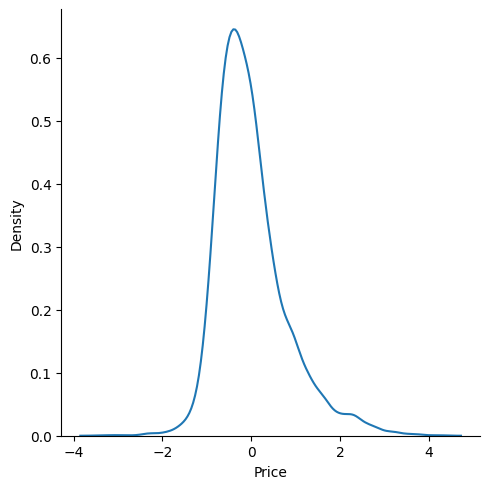

In [ ]:
sns.displot(residuals,kind = 'kde')


# Model Evalution

Evaluate the model performance using metrics such as Mean Squared Error (MSE) and Mean Absolute Error (RAE):

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


1. Mean Squared Error (MSE): Measures the average squared difference between predicted and true values. Lower MSE is better, with zero indicating a perfect fit.

2. Mean Absolute Error (MAE): Measures the average absolute difference between predicted and true values. Like MSE, lower MAE is better, with zero indicating a perfect fit.

3. R-squared (R2): This metric ranges from 0 to 1. A higher R2 value (closer to 1) suggests a better fit of the model to the data.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Assuming 'y_test' is the true target variable and 'reg pred' is the predicted values mse mean squared_error(y_test, reg pred)
mse= mean_squared_error(Y_Test, reg_pred)
mae= mean_absolute_error(Y_Test, reg_pred)

r2s =r2_score(Y_Test, reg_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")

print(f"Mean Absolute Error (MAE): {mae:.2f}")

print(f"R Squared Error (MAE): {r2s:.2f}")

Mean Squared Error (MSE): 0.63
Mean Absolute Error (MAE): 0.59
R Squared Error (MAE): 0.52


Calculate the Adjusted R-squared using the true values (y_test), predicted values (reg_pred), and the number of features (n_features):

In [ ]:
# Assuming 'n_features' is the number of features in your model
n = len(Y_Test)  # Number of observations
r2 = r2_score(Y_Test, reg_pred)
n_features = x_test_norm.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))

print(f"R-squared (R2): {r2:.2f}")
print(f"Adjusted R-squared: {adjusted_r2:.2f}")


R-squared (R2): 0.52
Adjusted R-squared: 0.52


Calculate RMSE
The Root Mean Squared Error (RMSE) is a commonly used metric for evaluating the performance of a regression model. It is the square root of the mean of the squared differences between predicted and true values.

In [ ]:
# Assuming 'y_test' is the true target variable and 'reg_pred' is the predicted values
mse = mean_squared_error(Y_Test, reg_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 0.63
Root Mean Squared Error (RMSE): 0.80


# Saving the Model.



In [ ]:
import pickle


**Save the Trained Model**
1. pickle.dump(model, model_file):
The pickle.dump() function serializes the trained model (model) and writes it to the opened file (model_file). This effectively saves the model to a file.
2. open('reg_model.pkl', 'wb'):
This line opens a file named 'reg_model.pkl' in binary write mode ('wb'). The 'wb' mode is used for binary files, as pickling involves writing binary data.



In [ ]:
pickle.dump(regression, open('reg_model.pkl', 'wb'))

1. **reg_model.pkl file:**
When you save a machine learning model using pickle and name the file as "reg_model.pkl", the resulting file will contain the serialized version of the trained regression model. Here's what you can expect the "reg_model.pkl" file to have:

2. **Serialized Model Parameters:**
The serialized version of the trained regression model, including all the parameters, coefficients, and other information necessary to represent the model's state.

3. **Model Type Information:**
Information about the type of regression model (linear regression, ridge regression, etc.) and any specific settings or hyperparameters used during training.

4. **Scikit-Learn Version Compatibility:**
Pickle files are sensitive to the version of the libraries used. The file may contain information about the version of scikit-learn or other libraries used to train the model.

5. **Dependencies:**
If there are any custom functions or objects used in the model (e.g., custom transformer classes), the pickle file may also include the necessary information to recreate those objects.

**Note:**It's important to note that the "reg_model.pkl" file is a binary file and is not meant to be human-readable. Its purpose is to store the internal state of the trained model so that it can be later loaded and used for making predictions without having to retrain the model.

6. **Confirm the Model is Saved**
Deserialization is the process of loading a pickled file back into a Python object. The pickle.load() function achieves this.

7. **loaded_model = pickle.load(model_file):**
The pickle.load() function reads the content of the file and deserializes it into the loaded_model object. This object can now be used for making predictions, just like the original model.

In [ ]:
model= pickle.load(open('reg_model.pkl','rb'))

**Scaling New Data**<br>
When you load a pre-trained machine learning model and use it to make predictions on new data without retraining, it's because the model has already learned the underlying patterns from the training data.

As hosuing conatins 8 featurss whereas we trian the data on scale of 6 features so we need to fit and scale it first.

In [ ]:
# Assuming 'features' is the DataFrame with 6 features used to train the model
model.predict(scaler.transform(features.iloc[[0]].values))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.07299562])

1. The 'scaler.transform()' method is used to scale the new data point. This is important because during the training phase, the model was likely trained on scaled features. Scaling ensures that the new data point is presented to the model in the same way as the training data.

2. The reshape(1, -1) is used to ensure that the shape of the data matches the expected input shape of the model. The -1 in the reshape function indicates that the size of that dimension is inferred from the length of the array.

3. The model.predict() method is applied to the scaled data point to obtain the model's prediction. The result is a numerical value representing the predicted house pric

# Regularization<br>
**Purpose** : To avoid overfitiing in the model.

In [ ]:
from sklearn.linear_model import Ridge, Lasso
lasso_regress= Lasso(alpha=1.0)
lasso_regress.fit(x_train_norm, Y_Train)

ridge_regress= Ridge(alpha=1.0)
ridge_regress.fit(x_train_norm, Y_Train)


Ridge()

In [ ]:
lasso_pred=lasso_regress.predict(x_test_norm)

In [ ]:
ridge_pred=ridge_regress.predict(x_test_norm)

In [ ]:
print(np.sqrt(mean_squared_error(Y_Test, lasso_pred)))

1.1456636798696462


In [ ]:
print(np.sqrt(mean_squared_error(Y_Test, ridge_pred)))

0.7952060452483322


**Note:**<br>
So in above model we can say we need to reduce the rmsa to least and here the ridge regression l2 regualiraztion works good on the data compartively.

# Thanks.....